In [56]:
# Task-02: K-means clustering for customer segmentation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



In [57]:
df=pd.read_csv(r"C:\Users\ChetanSharma\Downloads\archive (2)\Mall_Customers.csv")
df.head(5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [58]:
# Drop CustomerID safely (ignore if not present)
data = data.drop("CustomerID", axis=1, errors='ignore')

# Encode categorical feature 'Gender'
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])



In [59]:


# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)





In [60]:
# Find the optimal number of clusters using Elbow + Silhouette
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))





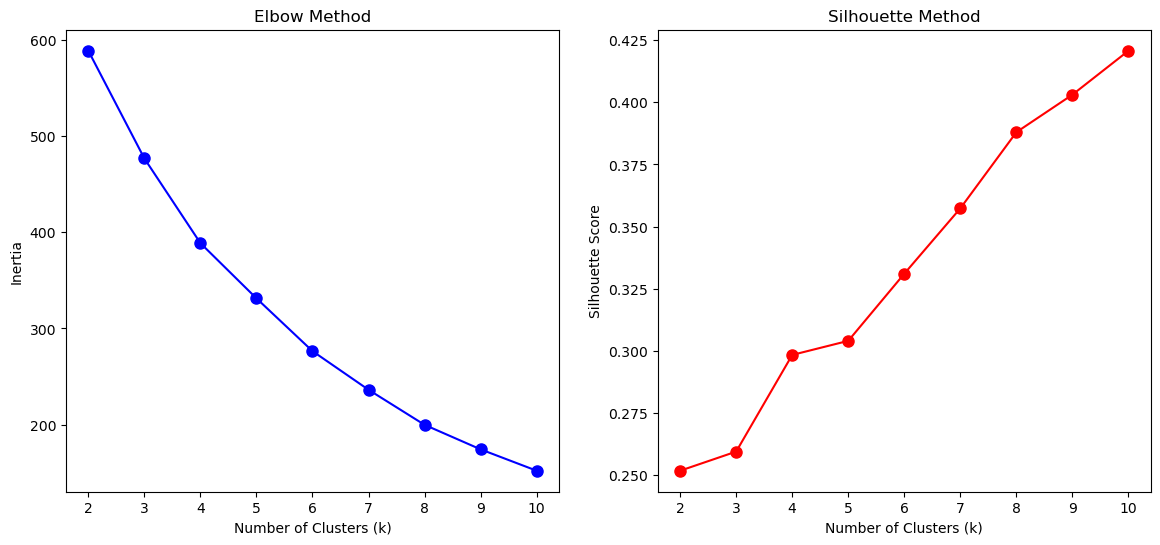

In [61]:
# Plot Elbow Method
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot Silhouette Scores
plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, 'ro-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

plt.show()



In [62]:
import numpy as np

# Choose best k (based on highest silhouette score)
best_k = K[np.argmax(silhouette_scores)]
print(f"Best number of clusters: {best_k}")

# Show first 10 rows of the dataset
print(data.head(10))


Best number of clusters: 10
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40
5       0   22                  17                      76
6       0   35                  18                       6
7       0   23                  18                      94
8       1   64                  19                       3
9       0   30                  19                      72


In [63]:
# Train final KMeans model
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
final_labels = final_kmeans.fit_predict(scaled_data)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)



In [64]:
# Add cluster labels to original data
data['Cluster'] = final_labels

# Visualize clusters based on 2 main features


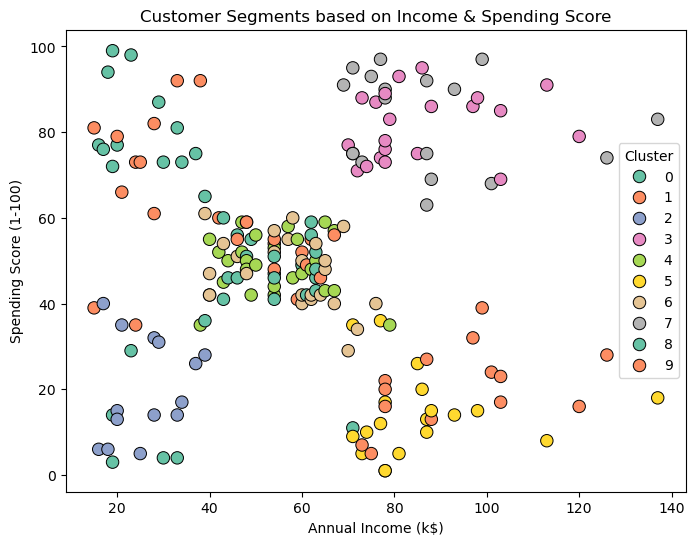

In [65]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=data['Annual Income (k$)'],
    y=data['Spending Score (1-100)'],
    hue=data['Cluster'],
    palette='Set2',
    s=80,
    edgecolor='k'
)
plt.title('Customer Segments based on Income & Spending Score')
plt.show()

# Show sample clustered dat